# Module 1: Data Wrangling with Python
## Sprint 4: Capstone Project


## About this Sprint

It is time for your first Capstone Project.
You will work on this project for the whole Sprint.

We are glad you have successfully reached the final Sprint of this Module.
You will put everything you have learned in this Module to work.
The outcome of this Module should potentially serve as your portfolio item.

Unlike with previous projects, this time, you are free to choose a dataset to explore from three suggested ones.
As you will have to solve a provided problem, there will not be a list of predefined questions you have to answer - be creative and explore any data dimensions you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry.
Often, it's your responsibility to not only give answers using the data but to raise questions first.
The more creatively you look at this project, the better.
Good luck!

## Objectives for this Part

- Practice identifying opportunities for data analysis.
- Practice performing EDA.
- Practice working with data from Kaggle.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data using Pandas.

### Fatal Police Shooting in the United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been a national issue since the 20th century.
The public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice.
**You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy about the police actions against civilians.
We also know that some states differ from the others, some cities are different from others, race equality is still an unanswered question.
There's also some talk about huge spendings on police, rumors about mental issues of those getting shot.
Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

You are given one dataset to start with.
Try to search for more datasets to enrich your data analysis.

Here's the dataset: [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use Pandas date APIs, create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a machine learning model to explain relationships between features and predict new values.
- Try to use a statistical significance test.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?




---



# Capstone project

## Analysis of Fatal Police Shooting in the United States

# Introduction

This file presents

**Exploratory Data Analysis of Fatal Police Shooting in the United States.**

The aim of this analysis is:
*   to assess how big the scale of the fatal police shootings is, 
*   to check if there is any pattern in police shooting,
*   to investigate if a specific country localization is connected to more crimes,
*   and many more.

My analysis helps to check if there could be psychological training provided for police officers to lower the amount of shootings(or even avoid them) focused on specific topics related to empathy, communication and so on or there should be any different steps taken (like more officers on duty) to prevent the phenomenon.

First part of the project includes:

*   importing libraries,
*   loading a dataset,
*   getting familiar with the dataset,
*   preparing data for further analysis.

In [ ]:
# Installation of geopandas, geopy and plotly by pip
!pip install geopandas
!pip install geopy
!pip install plotly==5.4.0
!pip install plotly_express==0.4.0
!pip install kneed

# Data analysis and calculation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Geographical analysis
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import geopandas

# Time-series analysis
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas.util.testing as tm
from fbprophet import Prophet
from pandas import to_datetime

# K-means clustering
from sklearn.cluster import KMeans
import kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Warnings handling
import warnings

In [ ]:
warnings.filterwarnings('ignore')

## Functions for graphs

In [ ]:
def barplot1(df_plot: pd.DataFrame, x: str, y: str):
  '''Creating a barplot'''

  sns.set(rc={'figure.figsize':(12,10)})
  sns.set_style("white")
  axis = sns.barplot(data=df_plot, x=x, y=y)
  sns.despine(bottom=True,
            left=True)
  annotate_bars(axis)
  axis.set(yticklabels=[])
  axis.set_xlabel('')
  axis.grid(False)
  

def lineplot1(df_plot: pd.DataFrame, x: str, y: str, hue: str):
  '''Creating a line plot'''

  sns.set(rc={'figure.figsize':(16,10)})
  sns.set_style("white")

  axis = sns.lineplot(data=df_plot, x=x, y=y, 
                    hue=hue, palette="colorblind", linewidth = 2.5)
  
  sns.despine(bottom=True,
              left=True)
  axis.set_xlabel('')
  axis.grid(False);

def annotate_bars(bars: str):
  '''Annotate horizontal graphs'''

  for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(1, 7),
                  textcoords='offset points')
  return

## Loading dataset from the Washington Posts' Github account

First step of working with the dataset is to load it from the Washington Posts' Github Account and then to print the first few rows to investigate what kind of data I will work with.

In [ ]:
fatal_shootings = pd.read_csv('/content/fatal-police-shootings-data.csv', 
                   index_col=0).reset_index()
fatal_shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


The first 5 rows of dataset corresponds with official description of a data provided by Washington Post on their Github Account https://github.com/washingtonpost/data-police-shootings

**id:** a unique identifier for each victim

**name:** the name of the victim

**date:** the date of the fatal shooting in YYYY-MM-DD format

**manner_of_death:**
*   shot
*   shot and Tasered

**armed:** indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
*   undetermined: it is not known whether or not the victim had a weapon
*   unknown: the victim was armed, but it is not known what the object was
*   unarmed: the victim was not armed

**age:** the age of the victim

**gender:** the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
*   **M:** Male
*   **F:** Female
*   **None:** unknown

**race:**
*   **W:** White, non-Hispanic
*   **B:** Black, non-Hispanic
*   **A:** Asian
*   **N:** Native American
*   **H:** Hispanic
*   **O:** Other
*   **None:** unknown

**city:** the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.

**state:** two-letter postal code abbreviation

**signs of mental illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

**threat_level:** The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

**flee:** News reports have indicated the victim was moving away from officers
*   Foot
*   Car
*   Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

**body_camera**: News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

**latitude and longitude:** the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

**is_geocoding_exact:** reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.



I don't need 'id' column for further analysis, so I will drop it.

In [ ]:
fatal_shootings=fatal_shootings.drop(columns='id', axis=1)

## General overview of the dataset

In [ ]:
fatal_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     6463 non-null   object 
 1   date                     6735 non-null   object 
 2   manner_of_death          6735 non-null   object 
 3   armed                    6529 non-null   object 
 4   age                      6409 non-null   float64
 5   gender                   6730 non-null   object 
 6   race                     5853 non-null   object 
 7   city                     6735 non-null   object 
 8   state                    6735 non-null   object 
 9   signs_of_mental_illness  6735 non-null   bool   
 10  threat_level             6735 non-null   object 
 11  flee                     6215 non-null   object 
 12  body_camera              6735 non-null   bool   
 13  longitude                6414 non-null   float64
 14  latitude                

From the first look on this brief summary I can see that I have **6735 entries** and some of the columns have missing values: name, armed, age, gender, race, flee, longitude and latitude. 

In [ ]:
fatal_shootings.describe()

,age,longitude,latitude
count,6409.000000,6414.000000,6414.000000
mean,37.105945,-97.111138,36.662910
std,12.975158,16.636047,5.387813
min,6.000000,-160.007000,19.498000
25%,27.000000,-112.074750,33.478250
50%,35.000000,-94.251500,36.101000
75%,45.000000,-83.104750,40.001750
max,92.000000,-67.867000,71.301000


Basic statistical parameters - mean, median, quantiles, min and max, apply in this specific dataset only to the 'age' column (longitude and latitude also have numeric type but in this case, as it is geographical location, these values doesn't mean anything - it represents GPS and have to be considered together). **The average age of the victim is 37 years, and 75% victims is younger that 45 years old. The oldest victim was 92 and the youngest - only 6 years old.**



---



# Data Cleaning

## Handling missing values

Checking for missing values is important because when some of your data is missing, it can lead to weak or biased analysis.

Information about missing value is easily accessed with .info(), what was already performed above. To confirm that I also perform short checking for null values method.

In [ ]:
fatal_shootings.isnull().sum()

name                       272
date                         0
manner_of_death              0
armed                      206
age                        326
gender                       5
race                       882
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       520
body_camera                  0
longitude                  321
latitude                   321
is_geocoding_exact           0
dtype: int64

As I mentioned above columns: name, armed, age, gender, race, flee, longitude and latitude contains some missing values.

Representation of localization of the missing values in the dataset.

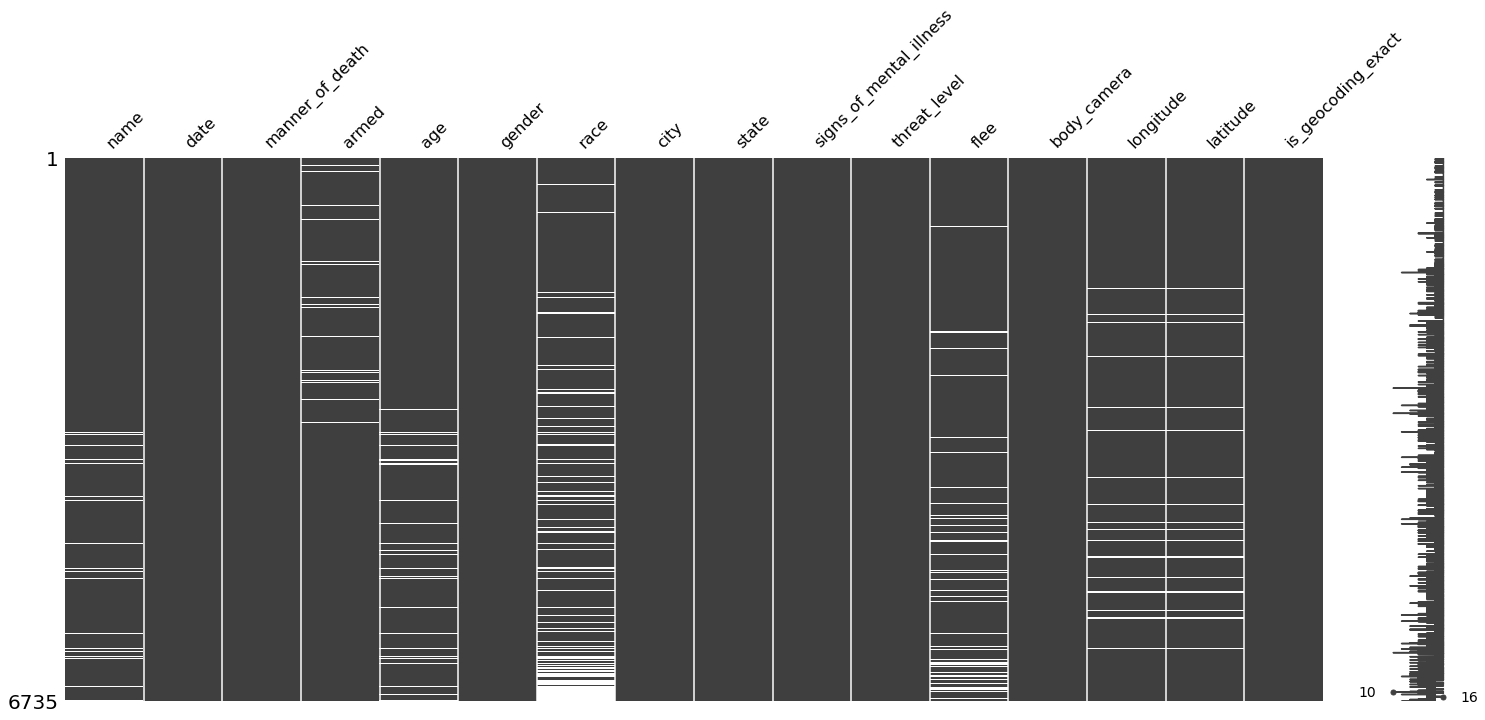

In [ ]:
msno.matrix(fatal_shootings);

Ways of dealing with missing values:

**Name** - I will fill missing values with 'missing' statement.

**Armed** - this feature tells us if the police officer was likely to act in a self-defense and cause death, so that information is important. 

**Age** - I will drop rows with null values because if I decide to fullfill it with mean or any other value, it can mislead my analysis.

**Gender** - I will drop rows with null values.

**Race** -  will fill missing values with 'unknown' statement.

**Flee** - First I check if a person who ran away was armed and if yes - I will fill that missing value with appropriate statement.

**Longitude and latitude** - As I have an information about city and the state, I will fill that values with a center of the city where the crime took place.

### Filling 'name' column with 'missing' statement

In [ ]:
fatal_shootings['name'] = fatal_shootings['name'].fillna('missing')

### Droping rows with from 'gender' column with missing values

In [ ]:
len(fatal_shootings[fatal_shootings['gender'].isnull()])

5

There are only 5 rows with missing values in 'gender' column. I'll drop them.

In [ ]:
fatal_shootings = fatal_shootings.dropna(subset=['gender'], how='all')

### Droping rows with missing values from 'age' column 

As filling 'age' column with mean or any other values could be misleading in further analysis, I decided to drop rows with NaN values from that column.

In [ ]:
fatal_shootings = fatal_shootings.dropna(subset=['age'], how='all')

### Handling rows with NaN in 'armed' and 'flee' column

First, deleting rows where both 'armed' and 'flee' information is missing.

In [ ]:
fatal_shootings = fatal_shootings.dropna(subset=['armed', 'flee'], how='all')

In [ ]:
fatal_shootings['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'chair',
       'pitchfork', 'hatchet and gun', 'rock', 'piece of wood',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete 

In [ ]:
CrosstabResult=pd.crosstab(index=fatal_shootings['armed'],
                           columns=fatal_shootings['flee']).sum()
CrosstabResult

flee
Car             898
Foot            819
Not fleeing    3796
Other           230
dtype: int64

In [ ]:
CrosstabResult.sum()

5743

In [ ]:
outcome = (
    f"Percent of people who were shot "
    f"and did not run away: {round(3796/5743*100, ndigits=2)}%"
)
outcome

'Percent of people who were shot and did not run away: 66.1%'

In [ ]:
len(fatal_shootings[((fatal_shootings['armed'] == 'unarmed') |
                 (fatal_shootings['armed'] == 'undetermined') |
                 (fatal_shootings['armed'] == 'unknown weapon')) &
                 (fatal_shootings['flee'] == 'Not fleeing')])

324

In [ ]:
outcome = (
    f"Percent of people who were armed "
    f"and did not run away: {round((1-(324/3796))*100, ndigits=2)}%"
)
outcome

'Percent of people who were armed and did not run away: 91.46%'

The conclusion could be that even if victims were armed, they rather didn't flee. Knowing that, I can fill rows from the 'flee' column that have information if victim was armed or not, with 'Not fleeing'. 

In [ ]:
item_counts = fatal_shootings["armed"].value_counts()
item_counts.head(10)

gun               3688
knife              928
unarmed            423
toy weapon         222
vehicle            204
undetermined       169
unknown weapon      76
machete             51
Taser               34
sword               25
Name: armed, dtype: int64

I fill rows from the 'armed' column with the most frequent value that is 'gun'.

In [ ]:
fatal_shootings['armed'] = fatal_shootings['armed'].fillna(
    fatal_shootings['armed'].value_counts().index[1])

In [ ]:
fatal_shootings['flee'] = fatal_shootings['flee'].fillna(
    fatal_shootings['flee'].value_counts().index[1])

In [ ]:
fatal_shootings.isnull().sum()

name                         0
date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                       664
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
longitude                  297
latitude                   297
is_geocoding_exact           0
dtype: int64

### Filling 'longitude' and 'latitude' columns based on city and state names

First I need to prepare additional column 'ADDRESS' with all possible information I can get from the place of shooting (City, State, Country).

In [ ]:
filled_addresses = fatal_shootings[((fatal_shootings['longitude'].isnull()) &
                 (fatal_shootings['latitude'].isnull()))]

filled_addresses.loc[:, 'ADDRESS'] = filled_addresses.loc[:, 'city'] + ',' + \
  filled_addresses.loc[:, 'state'] + ',' + 'USA'

I'm using geolocator to apply GPS location to each address for witch that information was missing.

In [ ]:
geolocator = Nominatim(user_agent="fatal_shootings_project")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
filled_addresses.loc[:, 'location'] = filled_addresses.loc[
    :, 'ADDRESS'].apply(geocode)

filled_addresses['point'] = filled_addresses['location'].apply(
    lambda loc: tuple(loc.point) if loc else None)

filled_addresses[['latitude', 'longitude', 'altitude']] = pd.DataFrame(
    filled_addresses.loc[:, 'point'].tolist(), index=filled_addresses.index)

In [ ]:
filled_addresses.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,ADDRESS,location,point,altitude
1370,Norman Campbell,2016-05-21,shot,gun,63.0,M,W,Chesterfield County,SC,False,attack,Not fleeing,False,-80.141784,34.650058,True,"Chesterfield County,SC,USA","(Chesterfield County, South Carolina, United S...","(34.6500578, -80.1417843, 0.0)",0.0
1372,Mark Nelson,2016-05-21,shot,gun,31.0,M,N,Flagstaff,AZ,True,attack,Not fleeing,True,-111.651823,35.198752,True,"Flagstaff,AZ,USA","(Flagstaff, Coconino County, Arizona, 86001, U...","(35.1987522, -111.6518229, 0.0)",0.0
1374,Jorge Zambrano,2016-05-22,shot,gun,35.0,M,H,Oxford,MA,False,attack,Not fleeing,False,-89.518766,34.366377,True,"Oxford,MA,USA","(Oxford, Lafayette County, Mississippi, 38655-...","(34.3663773, -89.5187664, 0.0)",0.0
1387,Fernando Castro,2016-05-26,shot,gun,19.0,M,H,Solvang,CA,False,attack,Car,False,-120.144162,34.584807,True,"Solvang,CA,USA","(Solvang, Santa Barbara County, California, 93...","(34.584807, -120.1441615764443, 0.0)",0.0
1401,Michael Johnson,2016-06-01,shot,gun,21.0,M,B,Newnan,GA,False,attack,Foot,True,-84.799657,33.380672,True,"Newnan,GA,USA","(Newnan, Coweta County, Georgia, 30263, United...","(33.3806716, -84.7996573, 0.0)",0.0


In [ ]:
filled_addresses = filled_addresses.drop(
    columns=['location', 'altitude', 'ADDRESS', 'point'], axis=1)

After some dataframe cleaning, I can fill NaN values from original dataset with the results from geolocator.

In [ ]:
fatal_shootings = fatal_shootings.combine_first(filled_addresses)

I'm also checking if all NaN values were located using geolocator and it turned out that I still have 3 rows with missing values, that I decide to drop.

In [ ]:
fatal_shootings[fatal_shootings['longitude'].isnull()]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
2922,Salvador Byassee,2017-12-26,shot,knife,34.0,M,NaN,300 block of State Line Road,TN,False,other,Other,False,NaN,NaN,True
4952,Joshua Franklin Roberts,2020-01-09,shot,gun,41.0,M,W,Powatan Point,OH,False,other,Car,False,NaN,NaN,True


In [ ]:
fatal_shootings = fatal_shootings.dropna(subset=['longitude'], how='all')


### Filling the 'race' column with 'unknown' statement

In [ ]:
fatal_shootings['race'] = fatal_shootings['race'].fillna('unknown')

In [ ]:
fatal_shootings.isnull().sum()

name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

## Checking for duplicates

I'm checking if any of the victims occur in the dataset multiple times.

In [ ]:
fatal_shootings[fatal_shootings.duplicated(
    subset=['name', 'armed', 'race', 'age', 'state'], keep=False)]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
5696,Kevin Carr,2020-10-14,shot,gun,23.0,M,B,South Los Angeles,CA,False,attack,Not fleeing,False,-118.278813,33.928291,True
5698,Kevin Carr,2020-10-14,shot,gun,23.0,M,B,Los Angeles,CA,False,attack,Car,False,-118.283000,33.935000,True
6726,Andrew Dzwonchyk,2021-11-07,shot,vehicle,40.0,M,unknown,Union Township,PA,False,attack,Car,False,-76.569000,40.484000,True
6732,Andrew Dzwonchyk,2021-11-14,shot,vehicle,40.0,M,unknown,Union Township,PA,False,undetermined,Car,False,-80.397630,41.012716,True


In [ ]:
fatal_shootings = fatal_shootings.drop_duplicates(
    subset=['name', 'armed', 'race', 'age', 'state'])

In [ ]:
fatal_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 0 to 6734
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     6395 non-null   object 
 1   date                     6395 non-null   object 
 2   manner_of_death          6395 non-null   object 
 3   armed                    6395 non-null   object 
 4   age                      6395 non-null   float64
 5   gender                   6395 non-null   object 
 6   race                     6395 non-null   object 
 7   city                     6395 non-null   object 
 8   state                    6395 non-null   object 
 9   signs_of_mental_illness  6395 non-null   bool   
 10  threat_level             6395 non-null   object 
 11  flee                     6395 non-null   object 
 12  body_camera              6395 non-null   bool   
 13  longitude                6395 non-null   float64
 14  latitude                

After performing Data Cleaning manipulation of data, I have 6394 out of 6735 entries.

In [ ]:
f"I can work with {round(6394/6735*100, ndigits=2)}% entries from the original dataset"

'I can work with 94.94% entries from the original dataset'

## Outliers

In [ ]:
Q1 = fatal_shootings['age'].quantile(0.25)
Q3 = fatal_shootings['age'].quantile(0.75)
IQR = Q3 - Q1

outliers_shootings = (fatal_shootings['age'] < (Q1 - 1.5 * IQR)) | (
    fatal_shootings['age'] > (Q3 + 1.5 * IQR)
)

((fatal_shootings['age'] < (Q1 - 1.5 * IQR)) | \
  (fatal_shootings['age'] > (Q3 + 1.5 * IQR))).sum()

63

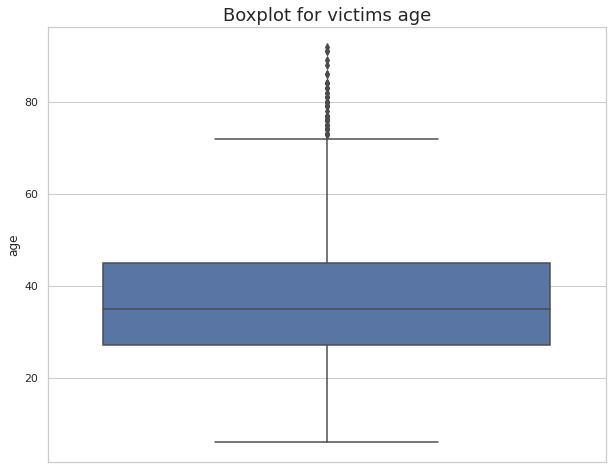

In [ ]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x=None, y=fatal_shootings["age"])
ax.set_title("Boxplot for victims age", fontsize=18);

I have 63 outliers, all lies abouve the upper whisker. However, they will not influence the analysis, so I leave these rows within the dataset.


---



# Exploratory Data Analysis

The goal of my analysis is to check:

1.   What is the average age of victims and check if any of the age group is more prone to be part of the shootings (and be killed intentionally or accidentally). How many women were shot?
2.   If there is any specific date when a lot of shootings took place? Is there any Bank Holiday or a specific period of the year when more shots are done? Does the number of shootings per year changed? How did it look like in 2015 when the oficial recording started and how does it look like in 2021?
3.   What is the ethnicity background of the victims. How does it look like tacking into account the whole population?
4.   What is the geographical distribution of the fatal shoots? Is there any region of the USA where more shoots are done?
5.   Is the presence of body camera a factor while shooting is done? 
6.   Were victims of fatal shootings mentally ill? Did they attack police officers? What kind of threats did they use? 



I hope to find the solution how the number of the victims could be decreased in the next years.



## Demografic spectrum of victims: age and gender

In [ ]:
#fatal_shootings = pd.read_csv('/content/fatal_shootings_ver2.csv', 
 #                  index_col=0)
#fatal_shootings.head()

At the beginning of the analysis I just want to simply check what is the distribution of victims age and how it differs regarding gender.

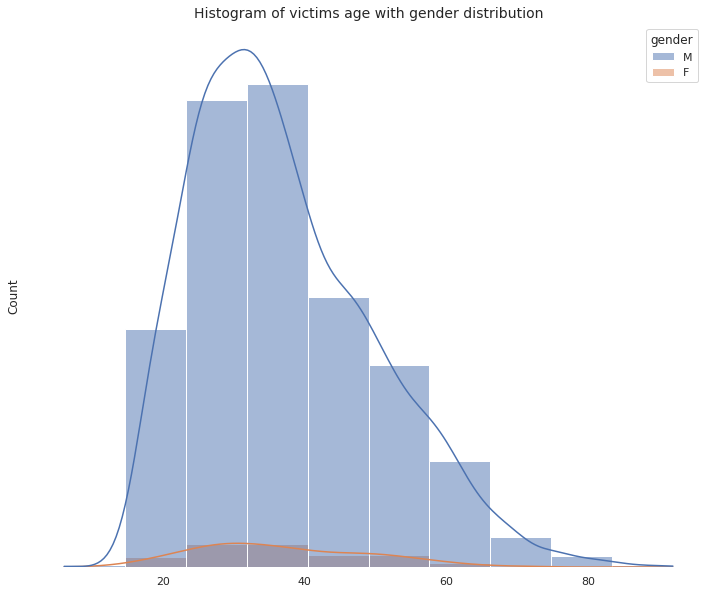

In [ ]:
sns.set(rc={'figure.figsize':(12,10)}, style="white")
axis = sns.histplot(data=fatal_shootings, x='age', 
                   bins=10, hue='gender', kde=True)

axis.set_title('Histogram of victims age with gender distribution', fontsize=14)

sns.despine(bottom=True,
            left=True)

axis.set(yticklabels=[], xlabel='')
axis.grid(False)

In [ ]:
victims_by_gender=fatal_shootings.groupby('gender').agg(
    {'gender': 'count', 'age': 'mean'})

victims_by_gender

,gender,age
gender,,
F,295,37.233898
M,6100,37.104754


In total, there were **6099** men and **295** women killed by shootings since 2015. The average age of the victims were **37**, no matter the gender of the victim. 

I want to check if there were any extreme cases of young victims.

In [ ]:
fatal_shootings[fatal_shootings['age'] < 15][
                  ['name', 'date', 'age', 'armed']].reset_index()

,index,name,date,age,armed
0,833,Jeremy Mardis,2015-11-03,6.0,unarmed
1,1017,Ciara Meyer,2016-01-11,12.0,unarmed
2,1587,Jesse James Romero,2016-08-09,14.0,gun
3,1680,Tyre King,2016-09-14,13.0,toy weapon
4,2799,Jason Ike Pero,2017-11-08,14.0,knife
5,2902,Kameron Prescott,2017-12-21,6.0,unarmed
6,3978,Antonio Arce,2019-01-15,14.0,toy weapon
7,6167,Adam Toledo,2021-03-29,13.0,undetermined
8,6553,Fanta Bility,2021-08-27,8.0,unarmed


In [ ]:
len(fatal_shootings[fatal_shootings['age'] < 18])

118

Among all victims there were **118** people considered as minors and within that group there were **9** people below 15 years old. Two of them were armed with a real weapon (gun and knife). 



---



## Date and seasonal analysis

Assuring that 'date' column in the dataframe has 'date' type.

In [ ]:
fatal_shootings['date'].describe()

count           6395
unique          2287
top       2018-04-01
freq               9
Name: date, dtype: object

In [ ]:
fatal_shootings['date']=pd.to_datetime(fatal_shootings['date'])

Calculating the number of shootings per month and year.

In [ ]:
#@title
year_and_month = fatal_shootings.groupby(
    [fatal_shootings['date'].dt.year, fatal_shootings['date'].dt.month],
    )['name'].agg('count')

year_and_month=year_and_month.to_frame().reset_index(level=-1)
year_and_month=year_and_month.rename(columns={'date': 'month', 'name': 'count'})
year_and_month = year_and_month.rename_axis('year').sort_values(
    by = ['year', 'month'], ascending = [True, True])

year_and_month=year_and_month.reset_index(level=0)
year_and_month.drop(year_and_month.tail(1).index,inplace=True)

year_and_month['date'] = year_and_month[
    ['year', 'month']].astype(str).agg('-'.join, axis=1)

year_and_month['month'] = year_and_month['month'].apply(
    lambda x: calendar.month_abbr[x])

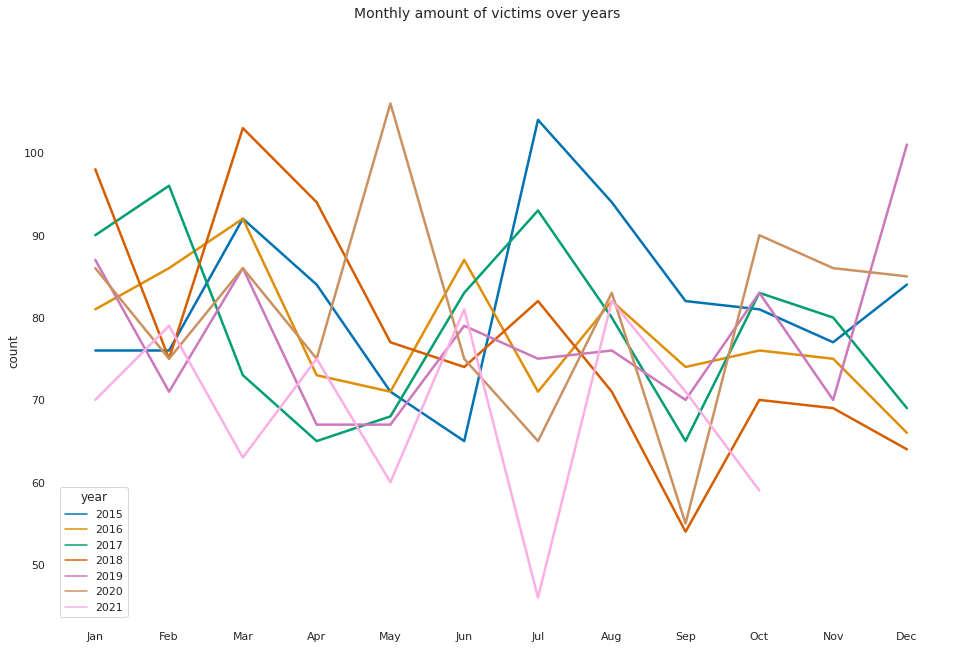

In [ ]:
lineplot1(year_and_month, 'month', 'count', 'year')
plt.suptitle('Monthly amount of victims over years', fontsize=14);

From this plot I can clearly see, that there is really hard to find any similarity between the number of victims for each month since the recording has begun. For instance, I can see the highest amount of victims in July 2015, while in July in 2021 the number of victims was the lowest. 

I want to check for extremes in number of victims to make myself sure if the highest/lowest amount of victims occurs or repeats in a specific month.

In [ ]:
year_and_month[year_and_month['count'] > 100][['date', 'count']]

,date,count
6,2015-7,104
38,2018-3,103
59,2019-12,101
64,2020-5,106


In [ ]:
year_and_month[year_and_month['count'] < 60][['date', 'count']]

,date,count
44,2018-9,54
68,2020-9,55
78,2021-7,46
81,2021-10,59


There is no pattern with the relation between number of victims/month.

Calculating cummulative sum for each of the year.

In [ ]:
year_and_month['cummulative_sum']=year_and_month.groupby(
    'year')['count'].cumsum()

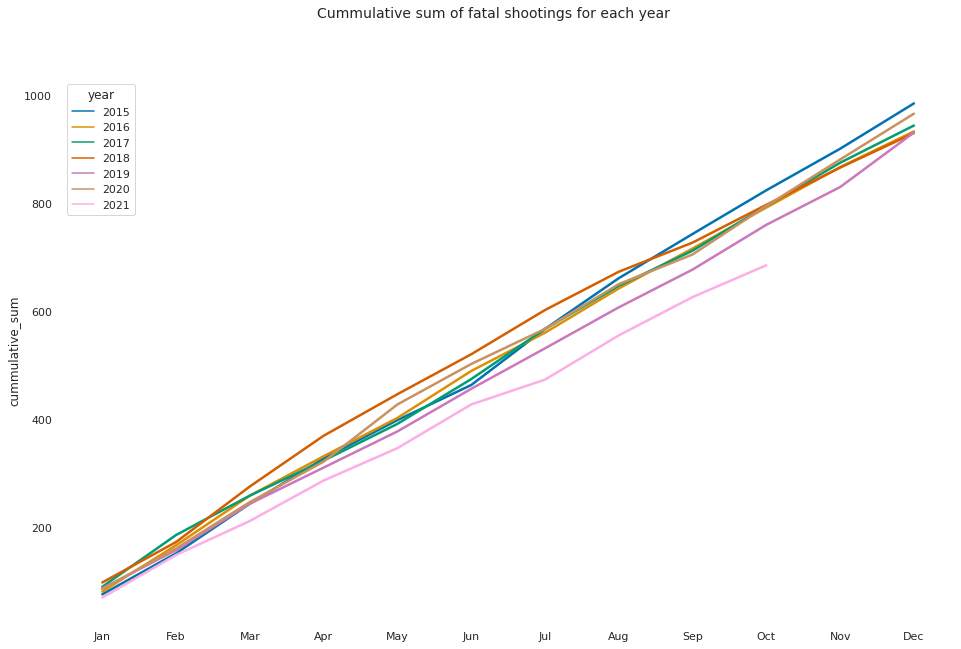

In [ ]:
lineplot1(year_and_month, 'month', 'cummulative_sum', 'year')
plt.suptitle('Cummulative sum of fatal shootings for each year', fontsize=14);

Cummulative sumof the number of the victims for each of the recorder year is almost the same. So the number of victims differs and is random, but the total number of victims is generally the same.

Visual representation of total number of victims per year.

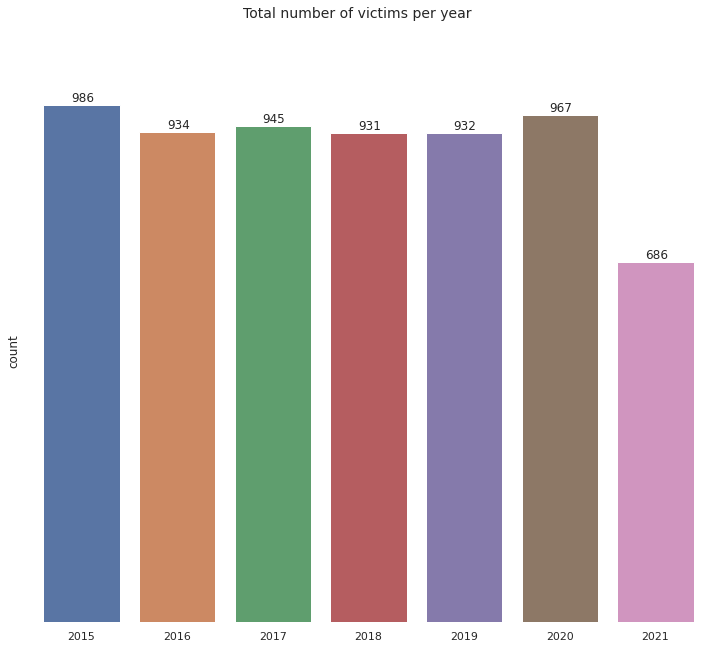

In [ ]:
victims_by_year = year_and_month.groupby('year').sum()
victims_by_year=victims_by_year.drop(
    columns='cummulative_sum', axis=1).reset_index()

barplot1(victims_by_year, 'year', 'count')
plt.suptitle('Total number of victims per year', fontsize=14);

Above graph confirms that the total number of victims from previous years is almost the same.

In [ ]:
year_and_month['date']=pd.to_datetime(year_and_month['date'])

Checking for seasonality.

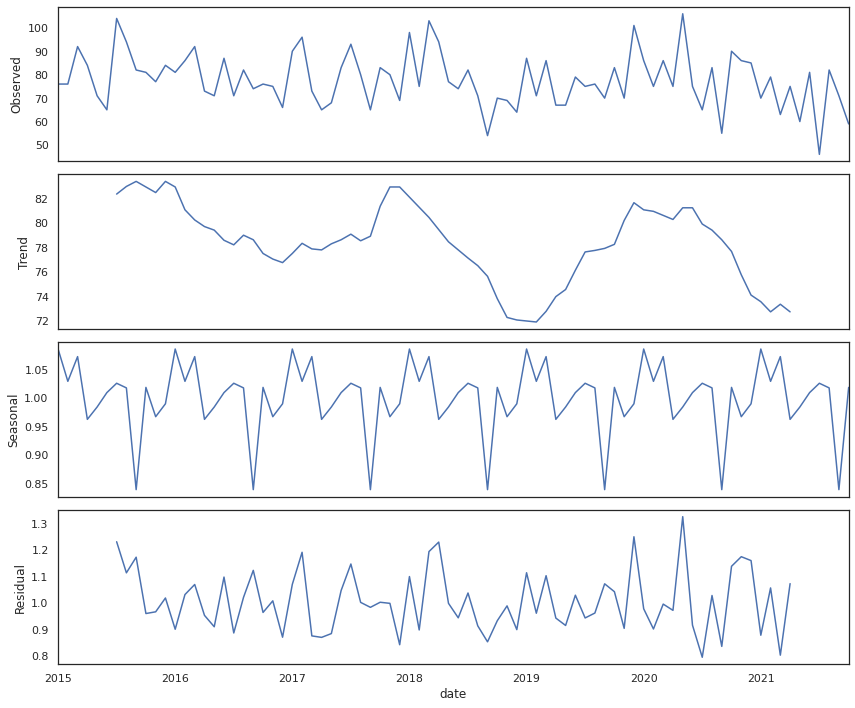

In [ ]:
year_and_month.set_index('date', inplace=True)

analysis = year_and_month[['count']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


There is no seasonal trends from the fatal shootings.

In [ ]:
year_and_month = year_and_month.reset_index()

Prediction of the number of victims for November and December 2021.

           ds       yhat  yhat_lower  yhat_upper
7  2021-08-01  82.515545   71.154881   93.711199
8  2021-09-01  64.650979   53.597697   75.885199
9  2021-10-01  73.356476   61.878475   84.524797
10 2021-11-01  65.926467   54.921790   77.884496
11 2021-12-01  73.666976   62.061253   84.979043


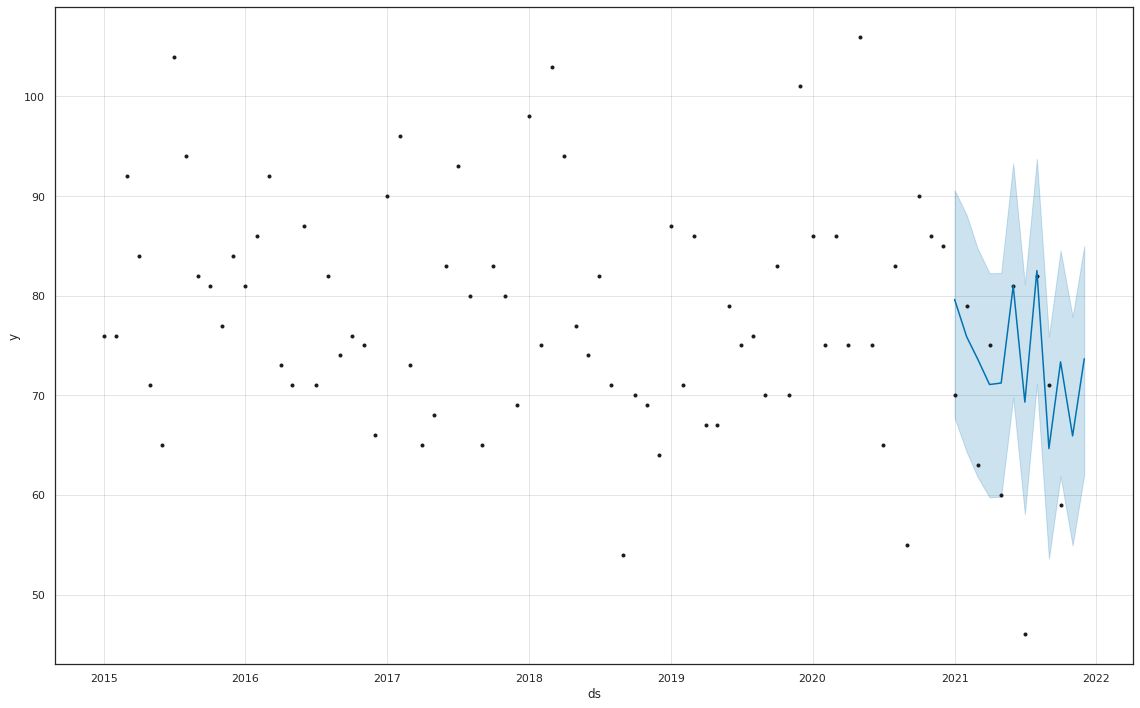

In [ ]:
prediction = year_and_month[['date', 'count']]

prediction.columns = ['ds', 'y']
prediction['ds']= to_datetime(prediction['ds'])

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(prediction)

future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
# plot forecast
model.plot(forecast, figsize=(16,10));

Predicted number of victims for November - 66 and December - 74.

Conclusions from time series analysis: 

1.   Each one from the recorded year, is not similar to one another, except of the total number of victims. I can't observe any particular drop (or rise) in the number of victims in any particular month or a period of the year.
2.   2015 is the year with the highest number of victims, however, this number is not significantly higher than values from other years.
3. The year 2021 is expected to have fewer victims than the previous years. The probable number of victims for November and December 2021 is equal to 66 and 74 respectively.
4.   A cumulative sum shows that the rise in the number of victims each year is stable. 
5.   Any of the Bank Holiday in US was related somehow to lower/higher number of victims in total.






---



## Ethnicity analysis

I want to check what was the total amount of victims per each of the ethnicity group.

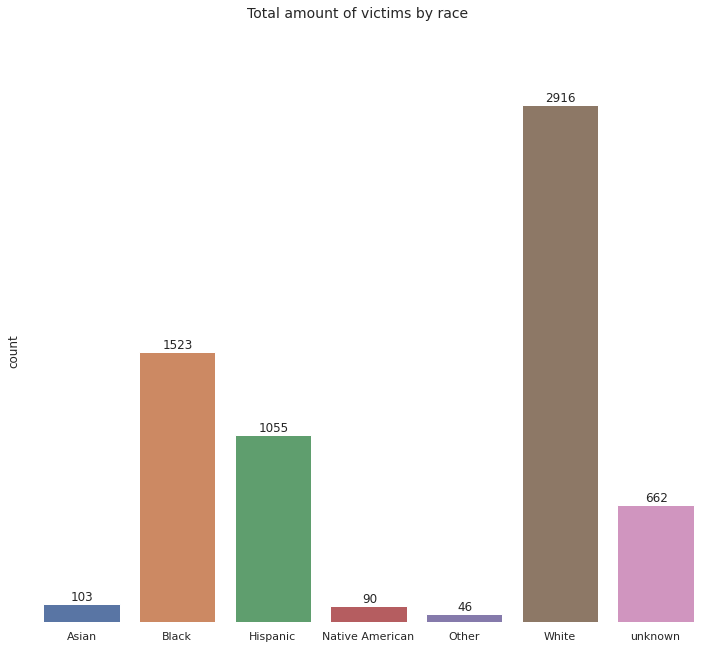

In [ ]:
ethnicity_plot = fatal_shootings.groupby('race') \
  ['name'].size().to_frame().reset_index()
ethnicity_plot = ethnicity_plot.rename(columns={'name': 'count'})
replace_values = {'A': 'Asian', 'B': 'Black', 
                  'H': 'Hispanic', 'N': 'Native American', 
                  'O': 'Other', 'W': 'White'}
ethnicity_plot = ethnicity_plot.replace({'race': replace_values})

barplot1(ethnicity_plot, 'race', 'count')
plt.suptitle('Total amount of victims by race', fontsize=14);


In [ ]:
population_US = {
    'race': ['Asian', 'Black', 'Hispanic', 'Native American', 'Other', 'White'],
    'population': [19900000, 41100000, 62100000, 3700000, 27900000, 204300000]}

population_US = pd.DataFrame(population_US)

Source: https://www.census.gov/library/stories/2021/08/improved-race-ethnicity-measures-reveal-united-states-population-much-more-multiracial.html 

For better understanding the scale of the shootings for each of the ethnicity group, I perform analysis per 1M of population for each group.

In [ ]:
ethnicity_plot['population'] = population_US['population']
ethnicity_plot['%_of_population'] = ethnicity_plot['count'] / \
  population_US['population'] * 100
ethnicity_plot['victims_per_1M_people'] = round( \
    ethnicity_plot['%_of_population'] * 1000000, ndigits=0)
ethnicity_plot

,race,count,population,%_of_population,victims_per_1M_people
0,Asian,103,19900000.0,0.000518,518.0
1,Black,1523,41100000.0,0.003706,3706.0
2,Hispanic,1055,62100000.0,0.001699,1699.0
3,Native American,90,3700000.0,0.002432,2432.0
4,Other,46,27900000.0,0.000165,165.0
5,White,2916,204300000.0,0.001427,1427.0
6,unknown,662,NaN,NaN,NaN


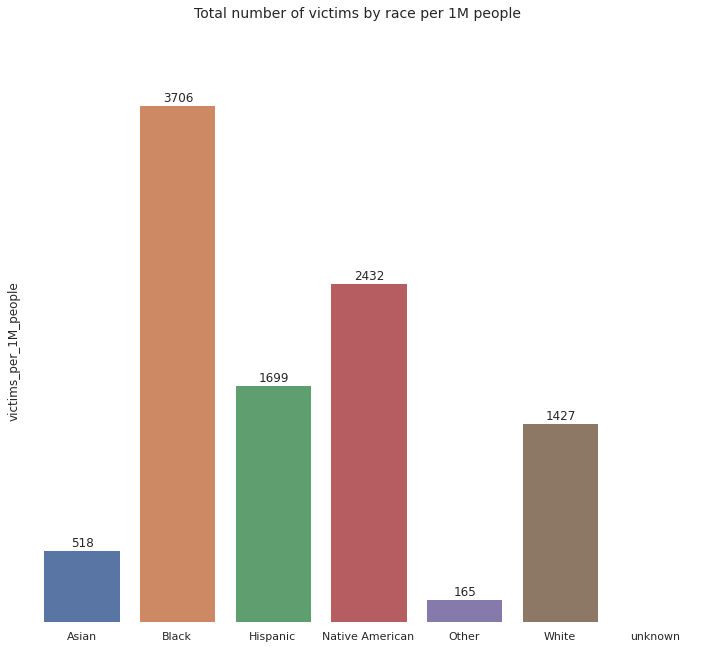

In [ ]:
barplot1(ethnicity_plot, 'race', 'victims_per_1M_people')
plt.suptitle('Total number of victims by race per 1M people', fontsize=14);

In [ ]:
ethnicity_plot = ethnicity_plot.set_index('race')

Visual comparison of total number of victims by race with the number of victims calculated per 1M people.

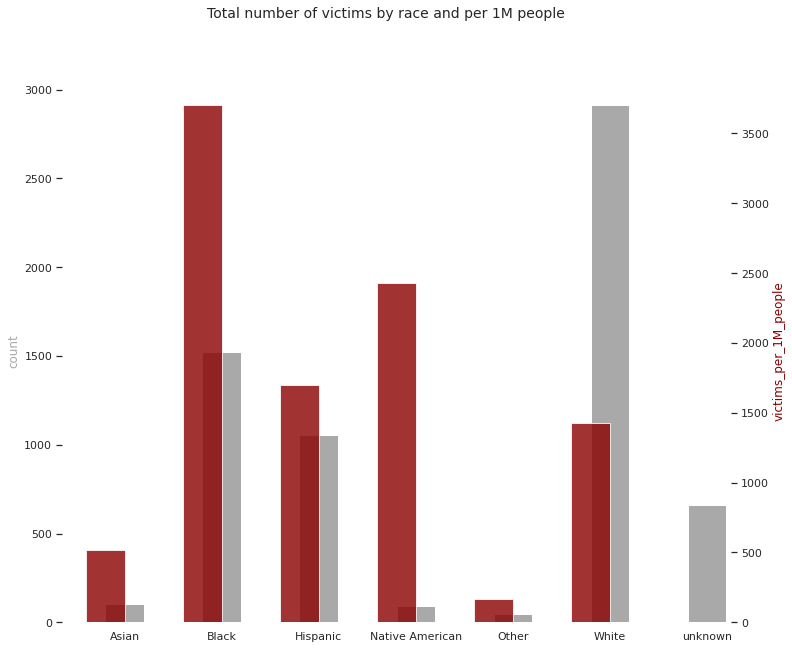

In [ ]:
fig = plt.figure()

with sns.axes_style("white"):
  ax = fig.add_subplot(111)
  ax2 = ax.twinx()

  width = 0.4

  ethnicity_plot['count'].plot(kind='bar', color = 'darkgrey', 
                               ax=ax, width=width, 
                               position=0.5, rot=0, alpha = 1.0)
  ethnicity_plot['victims_per_1M_people'].plot(kind='bar', color = 'darkred', 
                                               ax=ax2, width=width, position=1.0, 
                                               alpha =0.8)
  
  ax.set_ylabel('count', color='darkgrey', fontsize=12)
  ax2.set_ylabel('victims_per_1M_people', color='darkred', fontsize=12)

  plt.xticks(fontsize=14)
  sns.despine(bottom=True, left=True)
  ax.set_xlabel('')
  fig.suptitle('Total number of victims by race and per 1M people', fontsize=14)

  plt.show()

Conclusions: 

1.   At first sight one may think that the most common ethnicity of the victim is white, as the total number of victim is the highest.
2.   However, taking into account the population of people from each race in the US, and the % of the population that was killed in police shooting, there is a strong site-change, and the group that suffer the most, is black people.





---



## Geographical analysis of shootings

Preparation of data for geographical representation.

In [ ]:
geographic_distribution = fatal_shootings.groupby('state')['name'].size(
    ).to_frame().reset_index().sort_values('name', ascending=False)
geographic_distribution = geographic_distribution.rename(
    columns={'state': 'state', 'name': 'count'})

In [ ]:
#@title
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [ ]:
geographic_distribution['state_name'] = geographic_distribution['state'].map(
    abbrev_to_us_state)

In [ ]:
usa_states = pd.read_csv('/content/USA_States.csv')
population = pd.read_csv('/content/population.csv')

Source: https://www.census.gov/programs-surveys/decennial-census/decade/2020/2020-census-results.html 

In [ ]:
full_geographic_distribution = geographic_distribution.merge(usa_states, 
    how='inner', left_on='state_name', right_on='State')
full_geographic_distribution = full_geographic_distribution.drop(
    columns=['State'], axis=1)


Calculating in which state most shots took place as well as the calculation of the numbers of shootings per population from that state.

In [ ]:
#@title
full_geographic_distribution_with_population = \
  full_geographic_distribution.merge(population,
    how='inner', left_on='state_name', right_on='State' )
  
full_geographic_distribution_with_population = \
  full_geographic_distribution_with_population.drop(
    columns=['State'], axis=1)

full_geographic_distribution_with_population['ratio'] = \
  full_geographic_distribution_with_population['count'] /\
  full_geographic_distribution_with_population['Population'].astype(float) 

full_geographic_distribution_with_population = \
  full_geographic_distribution_with_population.sort_values('ratio', 
                                                           ascending=False)

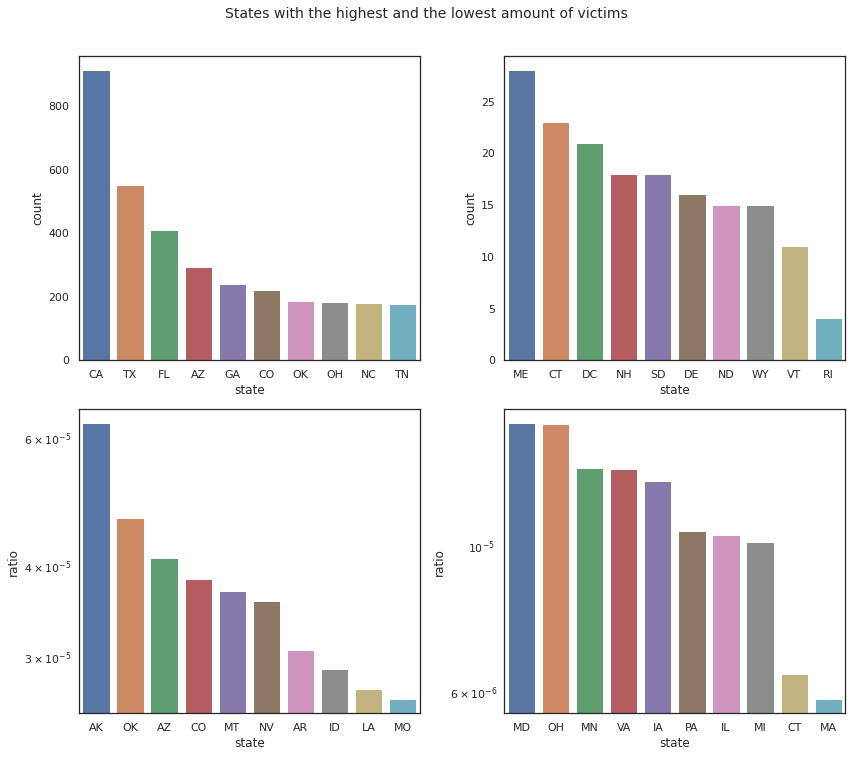

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.figsize=(16,14)
sns.barplot(ax=axes[0,0],
            data=full_geographic_distribution.head(10), x='state', y='count')
sns.barplot(ax=axes[0,1],
            data=full_geographic_distribution.tail(10), x='state', y='count')
ratio1=sns.barplot(ax=axes[1,0],
            data=full_geographic_distribution_with_population.head(10), 
            x='state', y='ratio')
ratio1.set_yscale('log')

ratio2=sns.barplot(ax=axes[1,1],
            data=full_geographic_distribution_with_population.tail(10), 
            x='state', y='ratio')
ratio2.set_yscale('log')


plt.suptitle('States with the highest and the lowest amount of victims',
             fontsize=14, y=1.05)


fig.tight_layout();

Conclusions:


1.   It is important to not look only for the total number of victims per state but also to calculate the ratio with the total state population.
2.   At first sight the most dangerous states are: California, Texas and Florida, and the safest: Wyoming, Vermont and Rhode Island.
3.   While checking the ratio, the most dangerous states are: Alaska, Oklahoma and Arizona, and the safest: Michigan, Connecticut and Massachusette.

However, there is also important to take a look at the map and see how big is the are of each of the states and how the habitants are spread across the state. I present general overview of the obtained results.



In [ ]:
#@title
gdf_geographic_map = geopandas.GeoDataFrame(
    full_geographic_distribution, geometry=geopandas.points_from_xy(
        x=full_geographic_distribution['Longitude'], 
        y=full_geographic_distribution['Latitude'])
)

gdf_geographic_map_pop = geopandas.GeoDataFrame(
    full_geographic_distribution_with_population, 
    geometry=geopandas.points_from_xy(
        x=full_geographic_distribution_with_population['Longitude'], 
        y=full_geographic_distribution_with_population['Latitude'])
)

In [ ]:
#@title

fig = px.choropleth(
    gdf_geographic_map,
    locations='state',
    locationmode='USA-states',
    color_continuous_scale='darkmint',
    color='count',
    scope='usa',
    labels={'count': 'Number of victims'}

)


fig.update_layout(
    title_text='Fatal police shootings by state',
    geo_scope="usa",
)

fig.update_layout(
    width=1500,
    height=750,
    legend=dict(
        yanchor="bottom",
        y=0.80,
        xanchor="right",
        x=0.95,
    ),
)

In [ ]:
fig = px.choropleth(
    gdf_geographic_map_pop,
    locations='state',
    locationmode='USA-states',
    color_continuous_scale='darkmint',
    color='ratio',
    scope='usa',
)


fig.update_layout(
    title_text='Fatal police shootings by state/population ratio',
    geo_scope="usa",
)

fig.update_layout(
    width=1500,
    height=750,
    legend=dict(
        yanchor="bottom",
        y=0.80,
        xanchor="right",
        x=0.95,
    ),
)

In [ ]:
#@title
geographic_race = fatal_shootings.groupby(['state', 'race'])['name'].size(
    ).to_frame().reset_index().sort_values('name', ascending=False)
geographic_race = geographic_race.rename(
    columns={'state': 'state', 'name': 'count'})

geographic_race = geographic_race.pivot(
    index='state', columns='race', values='count')
geographic_race = geographic_race.fillna(0)

full_geographic_distribution_with_race = full_geographic_distribution.merge(
    geographic_race, how='inner', left_on='state', right_on='state')
full_geographic_distribution_with_race = full_geographic_distribution_with_race.rename(
    columns={'A': 'Asian', 'B': 'Black', 
                  'H': 'Hispanic', 'N': 'Native American', 
                  'O': 'Other', 'W': 'White'}
)


In [ ]:
#@title
full_geographic_distribution_with_race['Asian'] = \
  full_geographic_distribution_with_race['Asian'].div(103)*100
full_geographic_distribution_with_race['Black'] = \
  full_geographic_distribution_with_race['Black'].div(1523)*100
full_geographic_distribution_with_race['Hispanic'] = \
  full_geographic_distribution_with_race['Hispanic'].div(1055)*100 
full_geographic_distribution_with_race['Native American'] = \
  full_geographic_distribution_with_race['Native American'].div(90)*100
full_geographic_distribution_with_race['Other'] = \
  full_geographic_distribution_with_race['Other'].div(46)*100
full_geographic_distribution_with_race['White'] = \
  full_geographic_distribution_with_race['White'].div(2915)*100

In [ ]:
#@title
fig_w = go.Figure(
    data=go.Scattergeo(
        lon=full_geographic_distribution_with_race['Longitude'] + 1,
        lat=full_geographic_distribution_with_race['Latitude'],
        text=full_geographic_distribution_with_race['state']
        + ": "
        + full_geographic_distribution_with_race['White'].astype(str),
        mode='markers',
        name='White',
        marker=dict(
            size=full_geographic_distribution_with_race['White'] * 1.5,
            opacity=0.8,
            symbol='square',
            colorscale='hot',
            cmin=0,
            line_color="rgb(40,40,40)",
            line_width=0.5,
            color=full_geographic_distribution_with_race['White'],
            cmax=full_geographic_distribution_with_race['White'].max(),
            colorbar_title="",
            showscale=False,
        ),
    )
)


fig_b = go.Figure(
    data=go.Scattergeo(
        lon=full_geographic_distribution_with_race['Longitude'],
        lat=full_geographic_distribution_with_race['Latitude'],
        text=full_geographic_distribution_with_race['state']
        + ": "
        + full_geographic_distribution_with_race['Black'].astype(str),
        mode='markers',
        name='Black',
        marker=dict(
            size=full_geographic_distribution_with_race['Black'] * 1.5,
            opacity=0.8,
            symbol='circle',
            colorscale='sunset',
            cmin=0,
            line_color="rgb(40,40,40)",
            line_width=0.5,
            color=full_geographic_distribution_with_race['Black'],
            cmax=full_geographic_distribution_with_race['Black'].max(),
            colorbar_title="",
            showscale=False,
        ),
    )
)


fig_n = go.Figure(
    data=go.Scattergeo(
        lon=full_geographic_distribution_with_race['Longitude'],
        lat=full_geographic_distribution_with_race['Latitude'] - 1,
        text=full_geographic_distribution_with_race['state']
        + ": "
        + full_geographic_distribution_with_race['Native American'].astype(str),
        mode='markers',
        name='Native American',
        marker=dict(
            size=full_geographic_distribution_with_race['Native American'] * 1.5,
            opacity=0.8,
            symbol='cross',
            colorscale='magma',
            cmin=0,
            line_color="rgb(40,40,40)",
            line_width=0.5,
            color=full_geographic_distribution_with_race['Native American'],
            cmax=full_geographic_distribution_with_race['Native American'].max(),
            colorbar_title="",
            showscale=False,
        ),
    )
)

fig_h = go.Figure(
    data=go.Scattergeo(
        lon=full_geographic_distribution_with_race['Longitude'] + 1,
        lat=full_geographic_distribution_with_race['Latitude'] - 1,
        text=full_geographic_distribution_with_race['state']
        + ": "
        + full_geographic_distribution_with_race['Hispanic'].astype(str),
        mode='markers',
        marker=dict(
            size=full_geographic_distribution_with_race['Hispanic'] * 1.5,
            opacity=0.8,
            symbol='triangle-up',
            colorscale='viridis',
            cmin=0,
            line_color="rgb(40,40,40)",
            line_width=0.5,
            color=full_geographic_distribution_with_race['Hispanic'],
            cmax=full_geographic_distribution_with_race['Hispanic'].max(),
            colorbar_title="",
            showscale=False,
        ),
        name='Hispanic',
    )
)


fig.add_trace(fig_w.data[0])
fig.add_trace(fig_b.data[0])
fig.add_trace(fig_n.data[0])
fig.add_trace(fig_h.data[0])


fig.update_layout(
    title_text='Fatal police shootings by state and race',
    legend=dict(
        font=dict(
            family='Courier',
            size=18,
            color='black'
        ),
        itemsizing='constant'
    )
    
)
fig.show()

In [ ]:
CA_TX = fatal_shootings[((fatal_shootings['state'] == 'FL') \
                             | (fatal_shootings['state'] == 'CA') |\
                            (fatal_shootings['state'] == 'TX')) &\
                            ((fatal_shootings['race'] == 'H') |\
                             (fatal_shootings['race'] == 'B'))]
FL = fatal_shootings[(fatal_shootings['state'] == 'FL') &
                            ((fatal_shootings['race'] == 'H') |\
                             (fatal_shootings['race'] == 'B'))]

frames = [CA_TX, FL]
CA_TX_FL = pd.concat(frames)
len(CA_TX_FL)

1194

In [ ]:
f'{len(CA_TX_FL)} out of {len(fatal_shootings)} shots took place in Califronia, Texas of Florida. That gives {round((len(CA_TX_FL)/len(fatal_shootings))*100, ndigits=2)}% cases'

'1194 out of 6395 shots took place in Califronia, Texas of Florida. That gives 18.67% cases'

In [ ]:
CA_TX_FL.groupby('city')['name'].agg('count').nlargest(5)


city
Los Angeles     70
Miami           52
Houston         47
Jacksonville    44
San Antonio     39
Name: name, dtype: int64

Analysis of ethnicity group among victims led me to conclustion that each case should be consider separately. A very important factor is the state, migrations moves, wheather, employment, just to name a few, that influences the spread of the population for each state (and the distribution of victims)



---



## Presence of body camera

In [ ]:
len_bc = len(fatal_shootings[fatal_shootings['body_camera'] == True])

In [ ]:
f'Only {len_bc} out of {len(fatal_shootings)} cases were recorded. That gives {round((len_bc)/len(fatal_shootings)*100, ndigits=2)}% cases'

'Only 901 out of 6395 cases were recorded. That gives 14.09% cases'

In [ ]:
len_bc_attack = len(fatal_shootings[((fatal_shootings['body_camera'] == True) &
                 (fatal_shootings['threat_level'] == 'attack'))])

In [ ]:
f'{len_bc_attack} out of {len_bc} cases were recorded and victim attacked a police officer. That gives {round((len_bc_attack/len_bc)*100, ndigits=2)}% cases'

'536 out of 901 cases were recorded and victim attacked a police officer. That gives 59.49% cases'

Conclusion:

Presence of body camera is not common in the line of duty. Even if there is a body camera, it's not always the case that police officer shot the suspect under her/his attack. 

Checking if there is a difference in distribuition of victims' race with or without presence of body camera.

In [ ]:
body_camera_df = fatal_shootings[fatal_shootings['body_camera']==True]


In [ ]:
#@title
ethnicity_plot2 = body_camera_df.groupby('race') \
  ['name'].size().to_frame().reset_index()
ethnicity_plot2 = ethnicity_plot2.rename(columns={'name': 'count'})
replace_values = {'A': 'Asian', 'B': 'Black', 
                  'H': 'Hispanic', 'N': 'Native American', 
                  'O': 'Other', 'W': 'White'}
ethnicity_plot2 = ethnicity_plot2.replace({'race': replace_values})

In [ ]:
no_body_camera_df = fatal_shootings[fatal_shootings['body_camera']==False]

In [ ]:
#@title
ethnicity_plot3 = no_body_camera_df.groupby('race') \
  ['name'].size().to_frame().reset_index()
ethnicity_plot3 = ethnicity_plot3.rename(columns={'name': 'count'})
replace_values = {'A': 'Asian', 'B': 'Black', 
                  'H': 'Hispanic', 'N': 'Native American', 
                  'O': 'Other', 'W': 'White'}
ethnicity_plot3 = ethnicity_plot3.replace({'race': replace_values})

In [ ]:
ethnicity_plot2['ratio'] = (ethnicity_plot2['count'] /\
                            ethnicity_plot2['count'].sum()) * 100
ethnicity_plot3['ratio'] = (ethnicity_plot3['count'] /\
                           ethnicity_plot3['count'].sum()) * 100


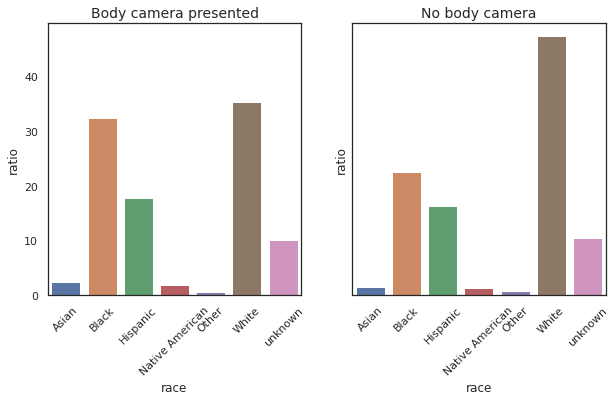

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
sns.barplot(data=ethnicity_plot2, x='race', y='ratio', ax=axes[0])
axes[0].set_title('Body camera presented', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=ethnicity_plot3, x='race', y='ratio', ax=axes[1])
axes[1].set_title('No body camera', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

Conclusion:
Very similar distribution amongst victims while taking Asian, Hispanic, Natwive Americans and unknown race of the victims. There is a difference with black/white people but the difference in the amount of victims is so huge, that it's hard to tell if the presence of body camera indeed change something.



---



## Mental illness and threat signs from victims

In [ ]:
len_mental = len(fatal_shootings[fatal_shootings['signs_of_mental_illness'] == True])

In [ ]:
outcome = (f'In {len_mental} out of {len(fatal_shootings)} cases police officers were attacked by victims with sighs of mental illness. '
          f'That gives {round((len_mental/len(fatal_shootings))*100, ndigits=2)}% cases')
outcome

'In 1463 out of 6395 cases police officers were attacked by victims with sighs of mental illness. That gives 22.88% cases'

In [ ]:
fatal_shootings['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [ ]:
len_combined = len(fatal_shootings[((fatal_shootings['armed'] != 'unarmed') |
                 (fatal_shootings['armed'] != 'undetermined') |
                 (fatal_shootings['armed'] != 'unknown weapon')) &
                 (fatal_shootings['threat_level'] == 'attack')])

In [ ]:
f'In {len_combined} out of {len(fatal_shootings)} cases police officers were attacked by the armed victim. That gives {round((len_combined/len(fatal_shootings))*100, ndigits=2)}% cases'

'In 4132 out of 6395 cases police officers were attacked by the armed victim. That gives 64.61% cases'

In [ ]:
len(fatal_shootings['armed'].unique())

98

Conclusion:

A lot of different kinds of weapon makes police officer training hard to plan and execute and also prepare for unexpected and new situations.



---



# K-means clustering

Choosing right features for clustering:
* **'name'** variable as is unique for each victim, so I won't be using this variable
* **'date'** variable will be also not valid for grouping
* **'city'**, **'longitude'**, **'latitude'** and **'is_geocoding_exact'** won't serve for clustering either. As a place of death, will be more suitable to use just state.

In [ ]:
clustering = fatal_shootings.reset_index()

In [ ]:
clustering = clustering.drop(columns=['name', 'date', 'city', 'longitude', 
                                      'latitude', 'is_geocoding_exact'], 
                                      axis=1)


Transforming categorical variable into integers

In [ ]:
X=clustering

In [ ]:
le=LabelEncoder()

X[['manner_of_death', 'armed', 'gender', 'race', 'state', 
   'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']] = \
   X[['manner_of_death', 'armed', 'gender', 'race', 'state', 
   'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']].apply(
       lambda x: le.fit_transform(x))

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = StandardScaler()

X = ss.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

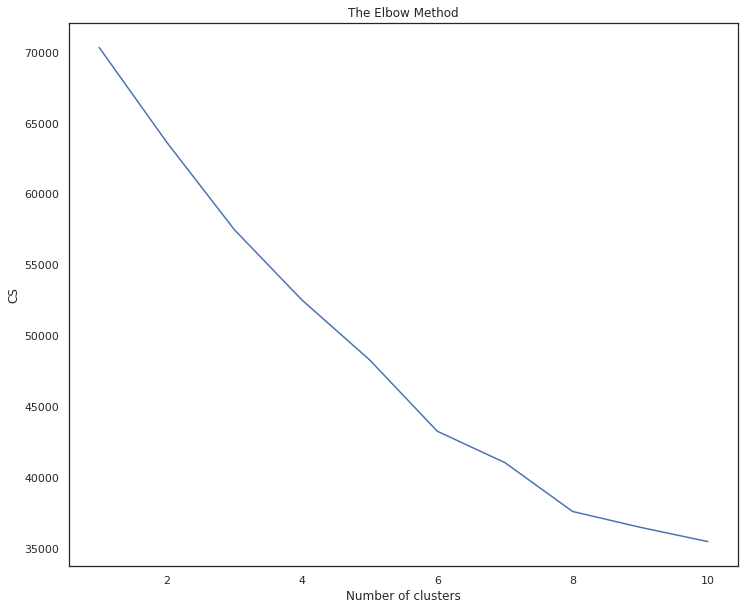

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [ ]:
X.insert(0, 'cluster', kmeans.labels_)

In [ ]:
fatal_shootings.insert(0, 'cluster', kmeans.labels_)

Geographical representation of cluster.

In [ ]:
#@title
fig = px.choropleth(
    gdf_geographic_map,
    locations='state',
    locationmode='USA-states',
    color_continuous_scale='darkmint',
    color='count',
    scope='usa',
)

fig.update_layout(
    title_text='Fatal police shootings grouped in clusters',
    geo_scope="usa",
)

fig.update_layout(
    width=1500,
    height=750,
    legend=dict(
        yanchor="bottom",
        y=0.80,
        xanchor="right",
        x=0.95,
    ),
)

fig_c = go.Figure(
    data=go.Scattergeo(
        lon=fatal_shootings['longitude'],
        lat=fatal_shootings['latitude'],
        text=fatal_shootings['state']
        + ": "
        + fatal_shootings['cluster'].astype(str),
        mode='markers',
        marker=dict(
            size=fatal_shootings['cluster'] * 2.5,
            opacity=0.8,
            symbol='circle',
            colorscale='Edge',
            cmin=0,
            line_color="rgb(40,40,40)",
            line_width=0.5,
            color=fatal_shootings['cluster'],
            cmax=fatal_shootings['cluster'].max(),
            colorbar_title="",
            showscale=False,
        ),
    )
)


fig.add_trace(fig_c.data[0])


fig.show()



# Conclusions

During Exploratory Data Analysis of Fatal Shootings by US Police Officers I have conducted investigation about the data, performed data cleaning and checked some aspects of victims characteristics:
* ethnicity
* place of death
* time (of year) of death
* mental state of victims, and many more.

My analysis lead me to following conclusions:

**Ethnicity**
* I successfuly conducted prediction of ethnicity of the victim for whom the race were unknown.
* Ethnicity analysis could at first sight lead to wrong conclusions: the highest amount of victims are of white race, however, taking into account the whole population of US, the most common race of the victim is black, then hispanic.

**Time of shots**
* There is no trend of the highest/lower amount of the victim in terms of part of the year/season/Bank Holiday - so the total amount of the victim/month is random.
* A cummulative sum of the number of victims/year is stable year to year with hope for the smaller amount of the victim for 2021.

**Geographical analysis**
* I was able to localize GPS of the place of death based on the city name and state.
* Geographical distribution of data needs to be performed carefully with the population and total area of the state took into account. 
* The most dangerous cities are Los Angeles, Miami and Houston.

**Other conclusions**
* Typical victim was: white man, age 37, armed with gun.
* Only 15% of the cases were recorded, however only in 60% of the cases, police officer was under attack.
* A majority of victims were armed, that may cause police officer to act in self-defense.


There could be some solutions taken into account while providing new strategy to limit the number of fatal shootings:
* more police officers should be on duty in more dense cities
* body camera should be considered as a must-have tool during duty 
* police officer should have trainings about cultural and race differences to better act in difficult situations with other race groups

Taking into account how many fatal police shootings take place in other well-developed countries as European countries: Switzerland (0!), Denmark (0!), Poland, Portugal, just to name a few, US has a tremendeous amount of victims. It could be caused by a 40-year-old law that allows police to shoot person when he 'thinks or sense' that his life is on threat. Maybe that is an issue - the law should be more restricted for police officer, that would also make them to think how to act differenty. (Source: https://worldpopulationreview.com/country-rankings/police-killings-by-country, https://en.wikipedia.org/wiki/List_of_killings_by_law_enforcement_officers_by_country, https://www.prisonpolicy.org/blog/2020/06/05/policekillings/, https://www.aclu.org/blog/criminal-law-reform/reforming-police/supreme-court-gives-police-green-light-shoot-first-and, https://www.americanbar.org/news/abanews/publications/youraba/2018/november-2018/legal-fact-check--what-is-the-legal-standard-for-deadly-force-in/).
